# Fashion Price Estimator Model

##### Overview
The goal of this project is analyze the fashion dataset readily available, gain insights from the dataset and build a price estimator model based on certain key features.


##### About the Dataset
This dataset captures essential details of Fashion products and user interactions, providing insights into product characteristics, brand performance, pricing, and user preferences across various product categories.
It can be used for data analysis in areas like customer behavior, product popularity, pricing strategies, and inventory management.

##### Questions the project answers
1. "How does the price distribution vary across different brands?"
2. How many products do most users tend to buy, and is there a common purchasing pattern?
3. What are the prices of individual products, and how do they compare across the range?
4. Most Common Product Colors?
5. Which categories and brands are most popular? Are there certain brands that dominate specific categories7,

In [1]:
#pip install pingouin

In [2]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import pingouin
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

In [3]:
#loading datset
df= pd.read_csv("fashion_products.csv")

## Data Exploration

In [4]:
#checking number of rows and columns

df.shape

(1000, 9)

In [5]:
#previewing first five rows
df.head()

,User ID,Product ID,Product Name,Brand,Category,Price,Rating,Color,Size
0,19,1,Dress,Adidas,Men's Fashion,40,1.043159,Black,XL
1,97,2,Shoes,H&M,Women's Fashion,82,4.026416,Black,L
2,25,3,Dress,Adidas,Women's Fashion,44,3.337938,Yellow,XL
3,57,4,Shoes,Zara,Men's Fashion,23,1.049523,White,S
4,79,5,T-shirt,Adidas,Men's Fashion,79,4.302773,Black,M


In [6]:
#Brief info on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   User ID       1000 non-null   int64  
 1   Product ID    1000 non-null   int64  
 2   Product Name  1000 non-null   object 
 3   Brand         1000 non-null   object 
 4   Category      1000 non-null   object 
 5   Price         1000 non-null   int64  
 6   Rating        1000 non-null   float64
 7   Color         1000 non-null   object 
 8   Size          1000 non-null   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 70.4+ KB


In [7]:
#statistical summary of the dataset
df.describe()

,User ID,Product ID,Price,Rating
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,50.41900,500.500000,55.785000,2.993135
std,28.78131,288.819436,26.291748,1.153185
min,1.00000,1.000000,10.000000,1.000967
25%,26.00000,250.750000,33.000000,1.992786
50%,50.00000,500.500000,57.000000,2.984003
75%,75.00000,750.250000,78.250000,3.985084
max,100.00000,1000.000000,100.000000,4.987964


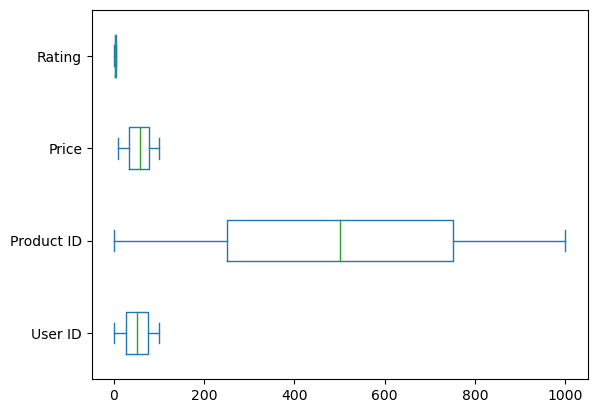

In [8]:
#visualizing if there are any outliers in our dataset
df.plot(kind= 'box', vert=False)
plt.show()

In [9]:
#Double-Checking for Null Cells
df.isnull().sum().to_frame()

,0
User ID,0
Product ID,0
Product Name,0
Brand,0
Category,0
Price,0
Rating,0
Color,0
Size,0


In [10]:
#Checking for duplicates
df.duplicated().sum()

0

In [11]:
#checking the individual sizes in the dataset
df["Size"].unique()

array(['XL', 'L', 'S', 'M'], dtype=object)

In [12]:
# checking the number of sizes in the dataset
df["Size"].value_counts().to_frame()

,Size
XL,254
L,251
S,249
M,246


In [13]:
#checking count of individual colors in our dataset
df["Color"].value_counts().to_frame()

,Color
White,193
Yellow,175
Blue,172
Green,156
Black,154
Red,150


In [14]:
#checking total prices by the brands in our dataset
total_prices_brands = df.groupby("Brand")["Price"].sum().to_frame()
total_prices_brands

,Price
Brand,
Adidas,10596
Gucci,10587
H&M,11168
Nike,12320
Zara,11114


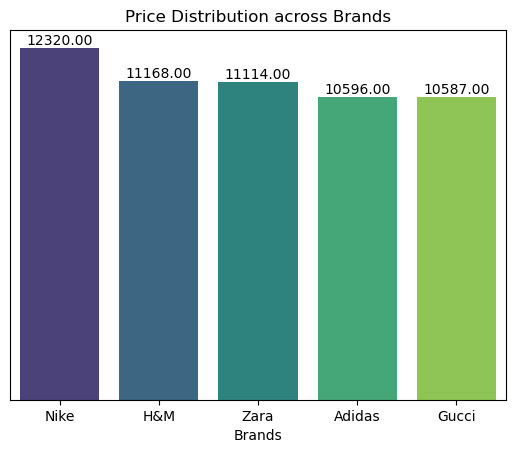

In [15]:
#sorting values in descending order
total_prices_brands = total_prices_brands.sort_values(by = 'Price', ascending= False)

#visualizing brands by prices
v = sns.barplot(x = total_prices_brands.index, y = total_prices_brands['Price'], palette = 'viridis')
v.set_title('Price Distribution across Brands')
plt.xlabel('Brands')
plt.ylabel('Price')
v.set(yticks=[], ylabel= '')


#adding data labels set to 2 decimal places
v.bar_label(v.containers[0], fmt= '%.2f')

plt.show()

In [16]:
#checking products in Lavender Lane's stock (dataset)
df["Product Name"].unique()

array(['Dress', 'Shoes', 'T-shirt', 'Jeans', 'Sweater'], dtype=object)

In [17]:
#checking product distribution by average prices
average_prices_product = df.groupby("Product Name")["Price"].mean().to_frame()
average_prices_product

,Price
Product Name,
Dress,53.289773
Jeans,56.696970
Shoes,56.738739
Sweater,54.788235
T-shirt,56.711443


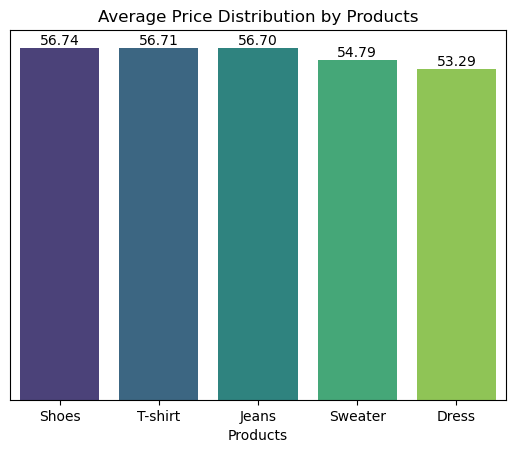

In [18]:
#sorting product values in descending order
average_prices_product = average_prices_product.sort_values(by = 'Price', ascending= False)

#visualizing brands by prices
g = sns.barplot(x = average_prices_product.index, y = average_prices_product['Price'], palette = 'viridis')
g.set_title('Average Price Distribution by Products')
plt.xlabel('Products')
plt.ylabel('Price')
g.set(yticks=[], ylabel= '')


#adding data labels set to 2 decimal places
g.bar_label(g.containers[0], fmt= '%.2f')

plt.show()

In [19]:
#checking the individual category in our dataset
df["Category"].unique()

array(["Men's Fashion", "Women's Fashion", "Kids' Fashion"], dtype=object)

In [20]:
#checking the count of category by products in the dataset
count_category_product = df.groupby("Category")["Product Name"].count().reset_index()

#sorting product values in descending order
count_category_product = count_category_product.sort_values(by = 'Product Name', ascending= False)
count_category_product

,Category,Product Name
0,Kids' Fashion,351
2,Women's Fashion,327
1,Men's Fashion,322


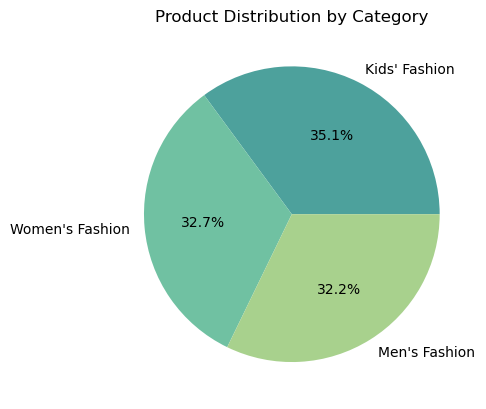

In [21]:
#visualizing category by products
custom_colors = ["#4DA19C", "#70C1A2", "#A8D18D"] 
q = plt.pie(count_category_product['Product Name'], labels = count_category_product['Category'], autopct= '%1.1f%%', colors= custom_colors)

#adding a title and labels to the chart
plt.title('Product Distribution by Category')

plt.show()

In [22]:
#checking the individual colors in our dataset
df["Color"].unique()

array(['Black', 'Yellow', 'White', 'Blue', 'Green', 'Red'], dtype=object)

In [23]:
#checking color distribution by products in the dataset
count_color_product = df.groupby("Product Name")["Color"].count().reset_index()

#sorting color distribution by products in descending order
count_color_product = count_color_product.sort_values(by = 'Color', ascending= False)
count_color_product

,Product Name,Color
1,Jeans,231
2,Shoes,222
4,T-shirt,201
0,Dress,176
3,Sweater,170


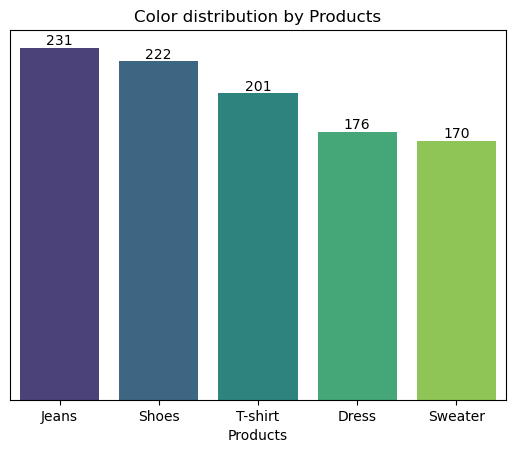

In [24]:
#visualizing color by products
h = sns.barplot(x = count_color_product['Product Name'], y = count_color_product['Color'], palette = 'viridis')
h.set_title('Color distribution by Products')
plt.xlabel('Products')
plt.ylabel('Color')
h.set(yticks=[], ylabel= '')


#adding data labels set to 2 decimal places
h.bar_label(h.containers[0])

plt.show()

#### After inspection, we noticed 
- the data types of many columns need to be changed.
- column rating must be round off to one decimal place.
- product id column will not help in our analysis hence can be dropped.
- some columns need renaming.
- a new column should be created for our rating metrics.

# Data Transformation

In [25]:
#Changing Data Types
df["Product Name"]= df["Product Name"].astype("category")
df["Brand"]= df["Brand"].astype("category")
df["Category"]= df["Category"].astype("category")
df["Color"]= df["Color"].astype("category")
df["Size"]= df["Size"].astype("category")
df["Price"]= df["Price"].astype("float")

In [26]:
#Rounding the rating column to one decimal place
df["Rating"]=round(df["Rating"],1)

In [27]:
#checking info if dtypes have changed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   User ID       1000 non-null   int64   
 1   Product ID    1000 non-null   int64   
 2   Product Name  1000 non-null   category
 3   Brand         1000 non-null   category
 4   Category      1000 non-null   category
 5   Price         1000 non-null   float64 
 6   Rating        1000 non-null   float64 
 7   Color         1000 non-null   category
 8   Size          1000 non-null   category
dtypes: category(5), float64(2), int64(2)
memory usage: 37.2 KB


In [28]:
#Dropping a column which will not be relevant in the analysis
data=df.drop(["Product ID"], axis=1)
data.head()

,User ID,Product Name,Brand,Category,Price,Rating,Color,Size
0,19,Dress,Adidas,Men's Fashion,40.0,1.0,Black,XL
1,97,Shoes,H&M,Women's Fashion,82.0,4.0,Black,L
2,25,Dress,Adidas,Women's Fashion,44.0,3.3,Yellow,XL
3,57,Shoes,Zara,Men's Fashion,23.0,1.0,White,S
4,79,T-shirt,Adidas,Men's Fashion,79.0,4.3,Black,M


In [29]:
#Renaming the columns
data=data.rename(columns={"User ID":"User_ID","Product Name":"Product", "Rating":"Rating_Scale"})
data.head()

,User_ID,Product,Brand,Category,Price,Rating_Scale,Color,Size
0,19,Dress,Adidas,Men's Fashion,40.0,1.0,Black,XL
1,97,Shoes,H&M,Women's Fashion,82.0,4.0,Black,L
2,25,Dress,Adidas,Women's Fashion,44.0,3.3,Yellow,XL
3,57,Shoes,Zara,Men's Fashion,23.0,1.0,White,S
4,79,T-shirt,Adidas,Men's Fashion,79.0,4.3,Black,M


In [30]:
#using the Rating_Scale as keys for our Rating metrics column
keys = data['Rating_Scale']  
keys_range = []
""" Creating an empty list for our metrics"""
for i in keys:
    if 1.0 <= i <= 1.9:
        keys_range.append('poor')
    elif 2.0 <= i <= 2.9:
        keys_range.append('fair')
    elif 3.0 <= i <= 3.9:
        keys_range.append('good')
    elif 4.0 <= i <= 4.9:
        keys_range.append('very good')
    else:
        keys_range.append('excellent')
        

#Now that we have our metrics, we can save it in the column it belongs to
data['Rating'] = keys_range
data['Rating'].head()       #preview column

0         poor
1    very good
2         good
3         poor
4    very good
Name: Rating, dtype: object

In [31]:
#previewing data
data.head(3)

,User_ID,Product,Brand,Category,Price,Rating_Scale,Color,Size,Rating
0,19,Dress,Adidas,Men's Fashion,40.0,1.0,Black,XL,poor
1,97,Shoes,H&M,Women's Fashion,82.0,4.0,Black,L,very good
2,25,Dress,Adidas,Women's Fashion,44.0,3.3,Yellow,XL,good


### More Data Visualizations:

The histogram below shows the product distribution in our dataset and bar chart below shows the distribution of preferred sizes across the different category in our dataset.

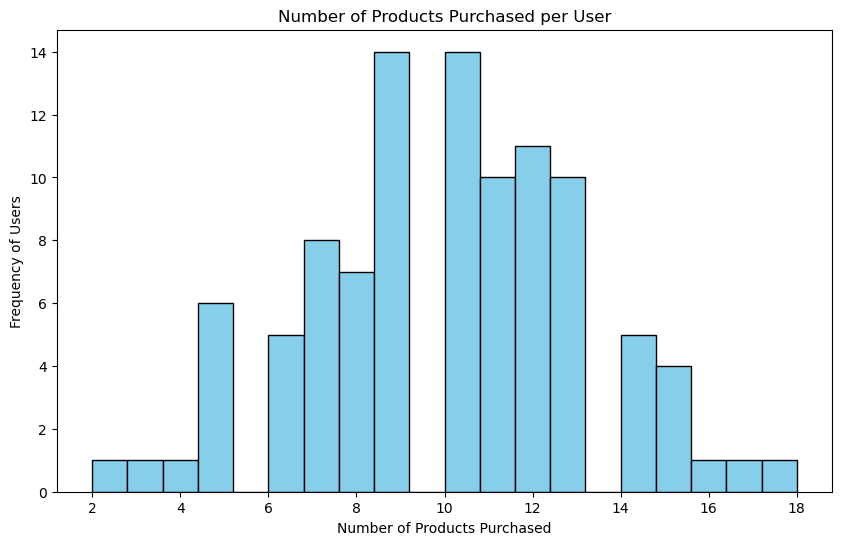

In [32]:
# counting the number of product purchases per user
user_purchases = data.groupby('User_ID')['Product'].count()

# Plot histogram of purchases per user
plt.figure(figsize=(10, 6))
plt.hist(user_purchases, bins=20, color="skyblue", edgecolor="black")

# Set title and labels
plt.title("Number of Products Purchased per User")
plt.xlabel("Number of Products Purchased")
plt.ylabel("Frequency of Users")

# Show plot
plt.show()

##### Insights from the Histogram
- Peak Purchase Range: The most common purchase range is between 8 to 12 products. This means that most users tend to purchase around 8-12 items.
- Frequency Distribution: The graph has a relatively symmetric shape, peaking around 10 products per user, with fewer users making extremely low or high numbers of purchases.
- Outliers: There are a few users who have purchased either very few products (e.g., 2-4) or a high number of products (e.g., 16-18), but these cases are less frequent.

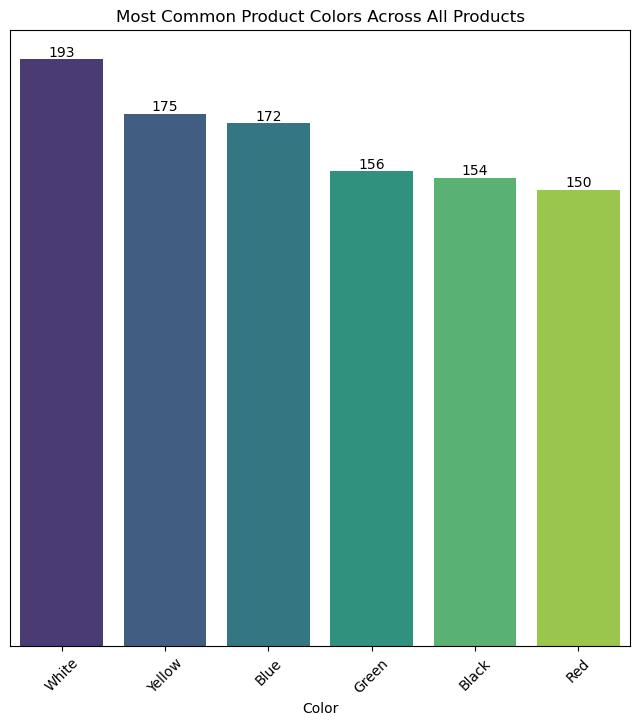

In [33]:
# Count the frequency of each color and sort by frequency in descending order
color_counts = data['Color'].value_counts().reset_index()
color_counts.columns = ['Color', 'Frequency']
color_counts = color_counts.sort_values(by='Frequency', ascending=False).reset_index(drop=True)

# Plot color frequencies
plt.figure(figsize=(8, 8))
plot=sns.barplot(data=color_counts, x='Color', y='Frequency', palette='viridis', order=color_counts['Color'])
plt.title('Most Common Product Colors Across All Products')
plt.xlabel('Color')
plt.xticks(rotation=45)
plot.get_yaxis().set_visible(False)
# Add data labels with more space above the bars
for i, v in enumerate(color_counts['Frequency']):
    plt.annotate(str(v), (i, v), ha='center', va='bottom', fontsize=10)  # Adjusted offset for better visibility

# Save the plot as a PNG file
plt.savefig('seaborn_plot2.png')

#Displaying chart
plt.show()


#### Distribution of Colors: 

The bar chart shows the distribution of preferred colors across different products.

Color Values and Trend among the category : 
White has the highest value (193), while Red has the lowest value (150), which means white is the common preferred color across the fashion categories (Men, Women and Kids) while Red is the least preferred

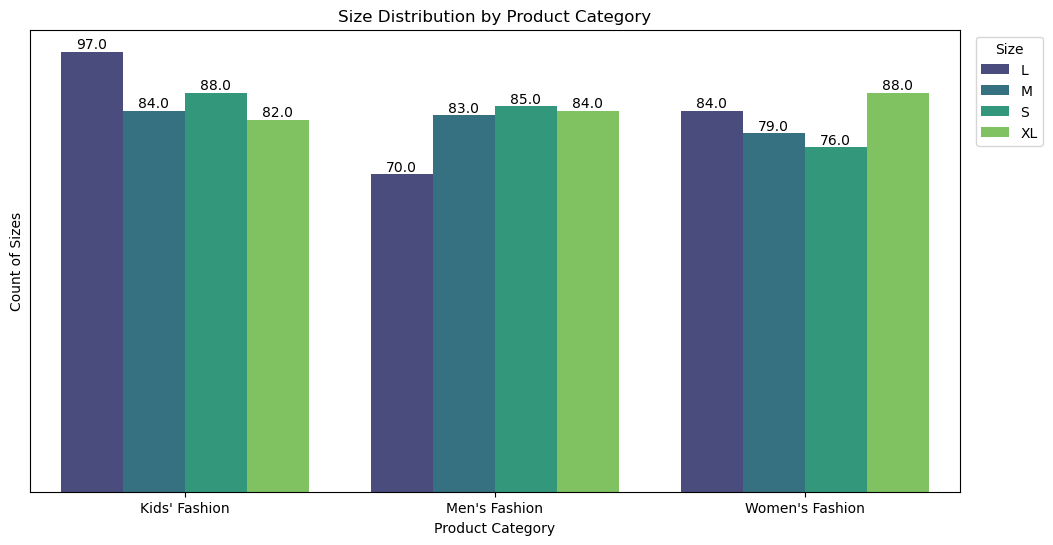

In [34]:
#visualizing size distribution across the different category in our dataset.
plt.figure(figsize=(12, 6))
df_sorted = df.sort_values(by= "Size")
ax = sns.countplot(data=df, x='Category', hue='Size', palette='viridis')
plt.title('Size Distribution by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Count of Sizes')

# Add data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black')

# Remove y-axis
plt.yticks([])

plt.legend(title='Size', bbox_to_anchor=(1.01, 1), loc='upper left')
#plt.xticks(rotation=45)

# Save the plot as a PNG file
plt.savefig('seaborn_plot3.png')

#Displaying chart
plt.show()

##### Overall Analysis
- The distribution of sizes varies across the three categories, indicating different sizing preferences for different demographics.

##### Size Distribution:
- Kids Fashion: The highest count is for size L, followed by S and M. This could show a substantial market for larger sizes within the Kids' Fashion Category, suggesting a greater percentage of children fall into the large size range.
   
- Men's Fashion: The highest count is for size S, followed by XL and M. This suggests a significant demand for small sizes within the Men's Fashion Category, indicating a larger percentage of men are seeking options in the small size range.
   
- Women's Fashion: The highest count is for size XL, followed by L and M. This could mean that there is a high demand for Extra Large sizes in the Women's Fashion Category , with a higher proportion of women in the Extra Large size range.
 

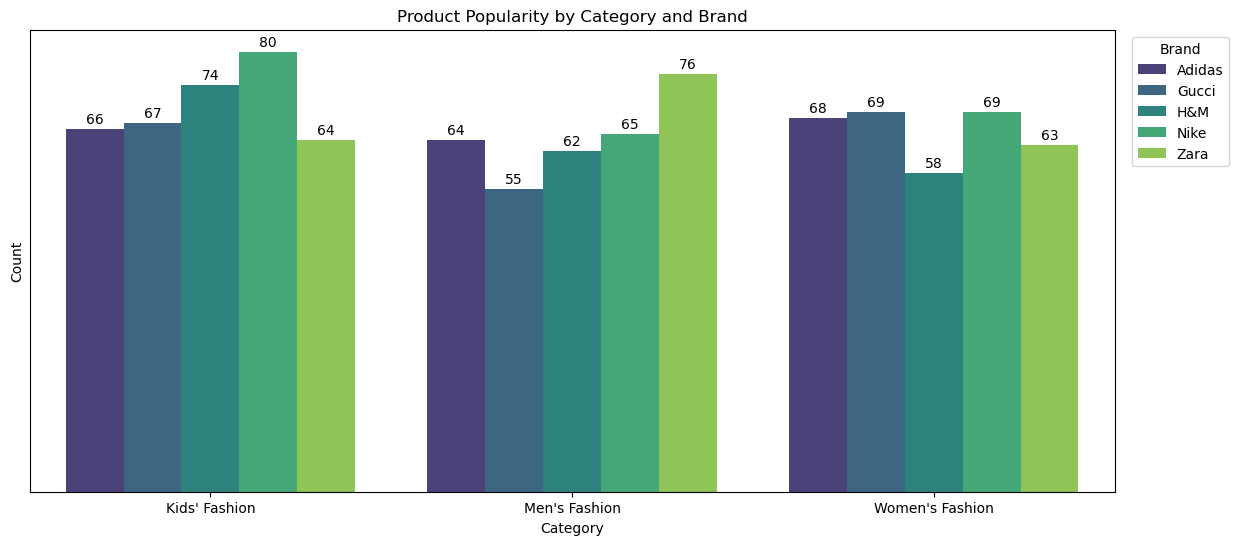

In [35]:
# Count the number of products in each category and brand combination
product_counts = df.groupby(['Category', 'Brand']).size().reset_index(name='Count')

#visualizing brand distribution across the different category in our dataset.
plt.figure(figsize=(14, 6))
ax = sns.barplot(x='Category', y='Count', hue='Brand', data=product_counts, palette='viridis')
plt.title('Product Popularity by Category and Brand')
plt.xlabel('Category')
plt.ylabel('Count')

# Add data labels
for p in ax.patches:
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.0f}', (x + p.get_width()/2, y + height+0.5), ha='center', va="bottom")

#Moving Legend
plt.legend(title='Brand', bbox_to_anchor=(1.01, 1), loc='upper left')

# Remove y-axis
plt.yticks([])

# Save the plot as a PNG file
plt.savefig('seaborn_plot4.png')

#Displaying chart
plt.show()

# Bar Plot Analysis: Product Popularity by Category and Brand
The barplot shows the popularity of various brands within specific fashion categories, with color intensity and numeric values representing purchase counts. Darker shades indicate higher popularity, while lighter shades represent lower popularity. Here’s an analysis of the findings:

#### 1. Highest Popularity:

- Nike in Kids' Fashion stands out as the most popular brand-category combination, with a purchase count of 80. This cell is the darkest shade of blue, indicating the highest level of popularity in the heatmap.
- Zara in Men's Fashion follows closely with a purchase count of 76. This high value suggests that Zara is a particularly favored brand among male customers.

#### 2. Moderate Popularity:

- Gucci and Nike in Women's Fashion both have purchase counts of 69, showing they are equally popular in this category. The colors are mid-tone, suggesting moderate popularity.
- Adidas in Women's Fashion and Zara in Kids' Fashion also have fairly high popularity with counts of 68 and 64, respectively. This highlights Adidas and Zara as reliable brands for these segments.

#### 3. Lower Popularity:

- Gucci in Men's Fashion has the lowest popularity with a purchase count of 55, shown by the lightest color in the heatmap. This indicates that Gucci is less favored among male customers.
- H&M in Women's Fashion has a lower purchase count of 58, indicating that H&M has less appeal in this specific category compared to others.

#### 4. Brand Trends by Category:

- Kids' Fashion: Nike dominates this category, with the highest purchase count (80). Other popular brands in Kids' Fashion include Zara (64) and Gucci (67).

- Men's Fashion: Zara is the most popular brand in this category, with a significant purchase count of 76. In contrast, Gucci has a relatively lower count of 55, suggesting Zara’s stronger appeal to male customers.

- Women's Fashion: Adidas and Gucci are strong competitors here, both with purchase counts around 68-69. H&M, however, has lower popularity within Women’s Fashion, with a count of 58, showing room for improvement in this segment.

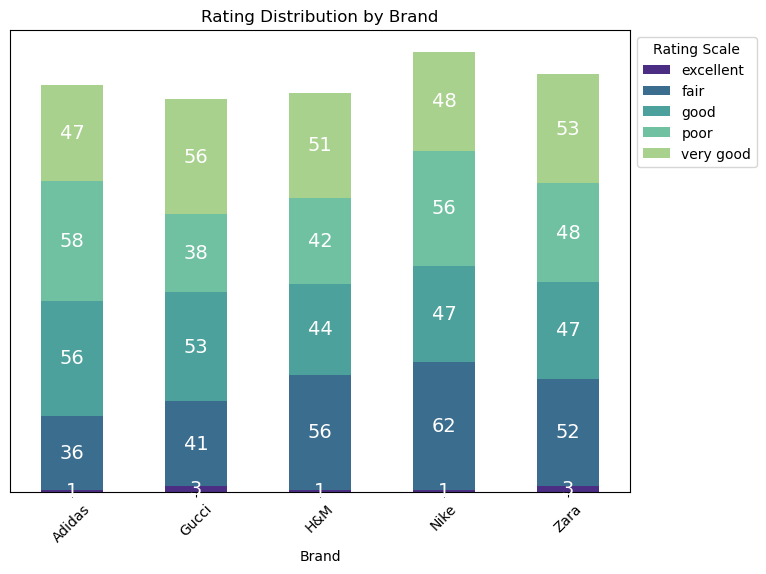

In [36]:
# Calculate the count of each rating per brand
rating_counts = data.groupby(['Brand', 'Rating']).size().unstack(fill_value=0)

# Define your custom colors with light green replacing yellow
custom_colors = ["#4B2E83", "#3B6D8F", "#4DA19C", "#70C1A2", "#A8D18D"] 


# Plot stacked bar chart to visualize rating across the different brands in stock.
fig, ax = plt.subplots(figsize=(8, 6))
rating_counts.plot(kind='bar', stacked=True, ax=ax, color=custom_colors)

plt.title('Rating Distribution by Brand')
plt.xlabel('Brand')
plt.xticks(rotation=45)
plt.legend(title='Rating Scale', bbox_to_anchor=(1.0, 1), loc='upper left')

# Remove y-axis
ax.yaxis.set_visible(False)

# Add data labels
for container in ax.containers:
    ax.bar_label(container, label_type='center', fmt='%d', fontsize=14, color='white')

# Save the plot as a PNG file
plt.savefig('seaborn_plot5.png')

#Displaying chart
plt.show()


#### 1. Adidas:

- The most common rating for Adidas products is "Poor," with 58 counts, shown in the deep purple section.
- "Fair" follows with 36 counts (blue).
- "Good" ratings are slightly more popular, with 56 counts (teal).
- Fewer ratings fall under "Very Good" with 22 counts (green), and "Excellent" has 26 counts (yellow).

#### 2. Gucci:

- Gucci has a slightly higher distribution of "Very Good" and "Excellent" ratings compared to Adidas.
- "Poor" has 38 counts (purple), the lowest among all brands for this rating.
- "Fair" follows with 41 counts (blue).
- The "Good" rating has the highest count for Gucci, with 53 (teal).
- "Very Good" and "Excellent" have 24 and 35 counts respectively (green and yellow).

#### 3. H&M:

- H&M shows a notable increase in "Excellent" ratings, with 28 counts (yellow).
- The "Poor" rating has a relatively higher frequency of 42 counts (purple).
- "Fair" and "Good" ratings are consistent at 44 and 56 counts, respectively.
- The "Very Good" rating is moderate, with 24 counts (green).

#### 4. Nike:

Nike stands out with a higher number of "Fair" ratings at 62 counts (blue), suggesting a balanced customer experience.
"Poor" ratings have 56 counts (purple).
"Good" ratings are moderate, with 47 counts (teal).
"Very Good" shows an increase at 31 counts (green).
"Excellent" has the fewest ratings at 18 counts (yellow).

#### 5. Zara:

- Zara has a fairly balanced distribution across "Good," "Very Good," and "Excellent" ratings.
- "Poor" has 48 counts (purple).
- "Fair" follows closely with 52 counts (blue).
- "Good" and "Very Good" ratings each have 47 counts (teal and green).
-"Excellent" has 30 counts, the highest among all brands for this category (yellow).

#### Summary:
Poor ratings dominate in Adidas and H&M, suggesting customer dissatisfaction is higher for these brands.
Nike stands out with a higher frequency of Fair ratings, indicating mixed reviews.
Zara and Gucci have more favorable distributions in higher ratings, with Gucci having a substantial count in the "Very Good" and "Excellent" categories.
This chart offers insight into brand performance based on customer ratings, showing that Gucci and Zara generally receive more positive feedback, while Adidas and H&M have a higher concentration of lower ratings.








## Hypothesis Testing

##### Scenario
Lavender Lane thinks that there is no difference in average rating across the different brands in stock. 
Further details have been provided in the documentation attached.

Null hypothesis (H0): Product categories do not influence the average rating.

Alternative hypothesis (H1): Product categories have a significant influence on the average rating. 

- Since our brand column had more than three independent groups, we used the Kruskal-Wallis test for our hypothesis. 
- if p <= alpha, reject hypothesis
- if p >= alpha, accept the hypothesis

In [37]:
#setting alpha to 0.05
alpha = 0.05

# Performing Kruskal-Wallis Test
kruskal_results = pingouin.kruskal(data=data, dv='Rating_Scale', between='Brand')
kruskal_results

,Source,ddof1,H,p-unc
Kruskal,Brand,4,6.857394,0.143619


In [38]:
#p-value is saved in the p-unc.
#saving our p-value as p and rounding off to 2 decimal place
p=round(kruskal_results["p-unc"], 2)
float(p)

0.14

In [39]:
#confirming null hypothesis
if (p <=alpha).all():
    print("REJECT NULL HYPOTHESIS")
else:
    print("There is no significant difference in the average rating across the different brands in stock")

There is no significant difference in the average rating across the different brands in stock


### Predictive Modeling - Machine Learning

Lavender Lane wants to go digital like any other retailer and wants customers to be able to have an estimated price quotation on their website given that they choose from our catalogue; the products in stock, colors, size, brands and category.

In [40]:
#extracting columns needed for our machine learning model
data = data[['Product', 'Brand', 'Category','Color', 'Size', 'Price']]
data

,Product,Brand,Category,Color,Size,Price
0,Dress,Adidas,Men's Fashion,Black,XL,40.0
1,Shoes,H&M,Women's Fashion,Black,L,82.0
2,Dress,Adidas,Women's Fashion,Yellow,XL,44.0
3,Shoes,Zara,Men's Fashion,White,S,23.0
4,T-shirt,Adidas,Men's Fashion,Black,M,79.0
...,...,...,...,...,...,...
995,Shoes,Zara,Women's Fashion,Black,M,55.0
996,Sweater,Nike,Kids' Fashion,Green,L,13.0
997,Sweater,Zara,Men's Fashion,White,L,47.0
998,T-shirt,Zara,Women's Fashion,Blue,S,68.0


In [41]:
# Encode each categorical column using One-hot encoding for 'Product', 'Brand', and 'Category' columns
data_encoded = pd.get_dummies(data, columns=['Product', 'Brand', 'Category', 'Color', 'Size'], dtype=int)
data_encoded.head(3)

,Price,Product_Dress,Product_Jeans,Product_Shoes,Product_Sweater,Product_T-shirt,Brand_Adidas,Brand_Gucci,Brand_H&M,Brand_Nike,...,Color_Black,Color_Blue,Color_Green,Color_Red,Color_White,Color_Yellow,Size_L,Size_M,Size_S,Size_XL
0,40.0,1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,82.0,0,0,1,0,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
2,44.0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [42]:
#replacing encoded numbers with desired number
data_encoded['Color_Yellow'] = data_encoded['Color_Yellow'].replace(1, 6)
data_encoded['Color_Yellow']    #replacing yellow color = 6

0      0
1      0
2      6
3      0
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: Color_Yellow, Length: 1000, dtype: int32

In [43]:
#assigning number codes to color white
data_encoded['Color_Yellow_White'] = np.where(data_encoded['Color_Yellow'] != 0, data_encoded['Color_Yellow'], data_encoded['Color_White'])

#replacing 5 for white color
data_encoded['Color_Yellow_White'] = data_encoded['Color_Yellow_White'].replace(1, 5)  #white color = 5

In [44]:
#assigning number code to color red
data_encoded['Color_Yellow_White_Red'] = np.where(data_encoded['Color_Yellow_White'] !=0, data_encoded['Color_Yellow_White'], data_encoded['Color_Red'])

#assigning 4 to color red
data_encoded['Color_Yellow_White_Red'] = data_encoded['Color_Yellow_White_Red'].replace(1, 4) #red color = 4

In [45]:
#assigning number codes to color green
data_encoded['Color_Yellow_White_Red_Green'] = np.where(data_encoded['Color_Yellow_White_Red'] !=0, data_encoded['Color_Yellow_White_Red'], data_encoded['Color_Green'])

#assigning 3 to color green
data_encoded['Color_Yellow_White_Red_Green'] = data_encoded['Color_Yellow_White_Red_Green'].replace(1, 3)    #green color = 3

In [46]:
#assigning number code to color blue
data_encoded['Color_Yellow_White_Red_Green_Blue'] = np.where(data_encoded['Color_Yellow_White_Red_Green'] !=0, data_encoded['Color_Yellow_White_Red_Green'], data_encoded['Color_Blue'])

#assigning 2 to color blue
data_encoded['Color_Yellow_White_Red_Green_Blue'] = data_encoded['Color_Yellow_White_Red_Green_Blue'].replace(1, 2)     #blue color = 2

In [47]:
#assigning number 1 code to black
data_encoded['Color_Yellow_White_Red_Green_Blue_Black'] = np.where(data_encoded['Color_Yellow_White_Red_Green_Blue'] != 0, data_encoded['Color_Yellow_White_Red_Green_Blue'], data_encoded['Color_Black'])
data_encoded['Color_Yellow_White_Red_Green_Blue_Black']    #black color is 1

0      1
1      1
2      6
3      5
4      1
      ..
995    1
996    3
997    5
998    2
999    5
Name: Color_Yellow_White_Red_Green_Blue_Black, Length: 1000, dtype: int32

In [48]:
data_encoded.head(3)

,Price,Product_Dress,Product_Jeans,Product_Shoes,Product_Sweater,Product_T-shirt,Brand_Adidas,Brand_Gucci,Brand_H&M,Brand_Nike,...,Color_Yellow,Size_L,Size_M,Size_S,Size_XL,Color_Yellow_White,Color_Yellow_White_Red,Color_Yellow_White_Red_Green,Color_Yellow_White_Red_Green_Blue,Color_Yellow_White_Red_Green_Blue_Black
0,40.0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,82.0,0,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
2,44.0,1,0,0,0,0,1,0,0,0,...,6,0,0,0,1,6,6,6,6,6


In [49]:
#dropping individual color columns
data_encode = data_encoded.drop(columns = ['Color_Yellow','Color_Yellow_White', 'Color_Yellow_White_Red', 'Color_Yellow_White_Red_Green', 'Color_Yellow_White_Red_Green_Blue'])

#renaming merged colors column
data_encode.rename(columns = {'Color_Yellow_White_Red_Green_Blue_Black' : 'Color'}, inplace = True)
data_encode.head(3)

,Price,Product_Dress,Product_Jeans,Product_Shoes,Product_Sweater,Product_T-shirt,Brand_Adidas,Brand_Gucci,Brand_H&M,Brand_Nike,...,Color_Black,Color_Blue,Color_Green,Color_Red,Color_White,Size_L,Size_M,Size_S,Size_XL,Color
0,40.0,1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,1
1,82.0,0,0,1,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,1
2,44.0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,6


#### Category Codes

In [50]:
#encoding kids as 0, women as 1 and men as 2
data_encode["Category_Men's Fashion"] = data_encode["Category_Men's Fashion"].replace(1, 2) #men
data_encode["Category_Men's Fashion"]

0      2
1      0
2      0
3      2
4      2
      ..
995    0
996    0
997    2
998    0
999    0
Name: Category_Men's Fashion, Length: 1000, dtype: int32

In [51]:
#merging individual encoded category into one
data_encode["Category"] = np.where(data_encode["Category_Men's Fashion"] != 0, data_encode["Category_Men's Fashion"], data_encode["Category_Women's Fashion"])
data_encode["Category"] # men = 2, women = 1 and kids = 0

0      2
1      1
2      1
3      2
4      2
      ..
995    1
996    0
997    2
998    1
999    1
Name: Category, Length: 1000, dtype: int32

In [52]:
#merging individual encoded category into one
data_encode["Category"] = np.where(data_encode["Category_Men's Fashion"] != 0, data_encode["Category_Men's Fashion"], data_encode["Category_Women's Fashion"])
data_encode["Category"] # men = 2, women = 1 and kids = 0

0      2
1      1
2      1
3      2
4      2
      ..
995    1
996    0
997    2
998    1
999    1
Name: Category, Length: 1000, dtype: int32

In [53]:
#preview encoded data
data_encode

,Price,Product_Dress,Product_Jeans,Product_Shoes,Product_Sweater,Product_T-shirt,Brand_Adidas,Brand_Gucci,Brand_H&M,Brand_Nike,...,Color_Blue,Color_Green,Color_Red,Color_White,Size_L,Size_M,Size_S,Size_XL,Color,Category
0,40.0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,2
1,82.0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,1
2,44.0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,6,1
3,23.0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,5,2
4,79.0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,1,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,55.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
996,13.0,0,0,0,1,0,0,0,0,1,...,0,1,0,0,1,0,0,0,3,0
997,47.0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,1,0,0,0,5,2
998,68.0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,2,1


In [54]:
#since category is merged into one, drop individual category
data_cleaned = data_encode.drop(columns = ["Category_Kids' Fashion", "Category_Men's Fashion", "Category_Women's Fashion"])
data_cleaned

,Price,Product_Dress,Product_Jeans,Product_Shoes,Product_Sweater,Product_T-shirt,Brand_Adidas,Brand_Gucci,Brand_H&M,Brand_Nike,...,Color_Blue,Color_Green,Color_Red,Color_White,Size_L,Size_M,Size_S,Size_XL,Color,Category
0,40.0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,2
1,82.0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,1
2,44.0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,6,1
3,23.0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,5,2
4,79.0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,1,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,55.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
996,13.0,0,0,0,1,0,0,0,0,1,...,0,1,0,0,1,0,0,0,3,0
997,47.0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,1,0,0,0,5,2
998,68.0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,2,1


#### Brand Codes

In [55]:
#creating specific encoded labels for brand Zara
data_cleaned['Brand_Zara'] = data_cleaned['Brand_Zara'].replace(1, 5) #zara
data_cleaned['Brand_Zara']  #Zara = 5

0      0
1      0
2      0
3      5
4      0
      ..
995    5
996    0
997    5
998    5
999    0
Name: Brand_Zara, Length: 1000, dtype: int32

In [56]:
#repeat step for brand Nike
data_cleaned['Nike_Zara'] = np.where(data_cleaned['Brand_Zara'] != 0, data_cleaned['Brand_Zara'], data_cleaned['Brand_Nike'])
data_cleaned['Nike_Zara'] = data_cleaned['Nike_Zara'].replace(1, 4) 
data_cleaned['Nike_Zara']       #Nike = 4

0      0
1      0
2      0
3      5
4      0
      ..
995    5
996    4
997    5
998    5
999    0
Name: Nike_Zara, Length: 1000, dtype: int32

In [57]:
#same for brand H&M
data_cleaned['Nike_Zara_H&M'] = np.where(data_cleaned['Nike_Zara'] != 0, data_cleaned['Nike_Zara'], data_cleaned['Brand_H&M'])
data_cleaned['Nike_Zara_H&M'] = data_cleaned['Nike_Zara_H&M'].replace(1, 3)
data_cleaned['Nike_Zara_H&M']    #H&M = 3

0      0
1      3
2      0
3      5
4      0
      ..
995    5
996    4
997    5
998    5
999    0
Name: Nike_Zara_H&M, Length: 1000, dtype: int32

In [58]:
#same for brand Gucci
data_cleaned['Nike_Zara_H&M_Gucci'] = np.where(data_cleaned['Nike_Zara_H&M']  != 0, data_cleaned['Nike_Zara_H&M'] , data_cleaned['Brand_Gucci'])
data_cleaned['Nike_Zara_H&M_Gucci'] = data_cleaned['Nike_Zara_H&M'].replace(1, 2)
data_cleaned['Nike_Zara_H&M_Gucci']    #Gucci = 2

0      0
1      3
2      0
3      5
4      0
      ..
995    5
996    4
997    5
998    5
999    0
Name: Nike_Zara_H&M_Gucci, Length: 1000, dtype: int32

In [59]:
#same for brand Adidas
data_cleaned['Nike_Zara_H&M_Gucci_Adidas'] = np.where(data_cleaned['Nike_Zara_H&M_Gucci']  != 0, data_cleaned['Nike_Zara_H&M_Gucci'] , data_cleaned['Brand_Adidas'])
data_cleaned['Nike_Zara_H&M_Gucci_Adidas']    #Adidas = 1

0      1
1      3
2      1
3      5
4      1
      ..
995    5
996    4
997    5
998    5
999    1
Name: Nike_Zara_H&M_Gucci_Adidas, Length: 1000, dtype: int32

In [60]:
#since brand is merged into one, drop individual brands and assign a new variable
data_clean = data_cleaned.drop(columns = ["Brand_Adidas", "Brand_Gucci", "Brand_H&M","Brand_Zara", "Brand_Nike", 
                                          "Nike_Zara", "Nike_Zara_H&M", "Nike_Zara_H&M_Gucci"])

#rename the brands merged as Brands_merged
data_clean.rename(columns ={"Nike_Zara_H&M_Gucci_Adidas": "Brand"}, inplace= True)
data_clean

,Price,Product_Dress,Product_Jeans,Product_Shoes,Product_Sweater,Product_T-shirt,Color_Black,Color_Blue,Color_Green,Color_Red,Color_White,Size_L,Size_M,Size_S,Size_XL,Color,Category,Brand
0,40.0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,2,1
1,82.0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,1,3
2,44.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,6,1,1
3,23.0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,5,2,5
4,79.0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,55.0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,1,5
996,13.0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,3,0,4
997,47.0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,5,2,5
998,68.0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,2,1,5


#### Size Codes

In [61]:
#assigning number codes to sizes
data_clean['Size_XL'] = data_clean['Size_XL'].replace(1, 3)  #Xl = 3
data_clean['Size_XL']

0      3
1      0
2      3
3      0
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: Size_XL, Length: 1000, dtype: int32

In [62]:
#assigning number codes to size L
data_clean['Size_XL_L'] = np.where(data_clean['Size_XL'] !=0, data_clean['Size_XL'], data_clean['Size_L'])

#replacing 1 with 2
data_clean['Size_XL_L'] = data_clean['Size_XL_L'].replace(1, 2)   #L = 2
data_clean['Size_XL_L']

0      3
1      2
2      3
3      0
4      0
      ..
995    0
996    2
997    2
998    0
999    2
Name: Size_XL_L, Length: 1000, dtype: int32

In [63]:
#assigning number codes to size M
data_clean['Size_XL_L_M'] = np.where(data_clean['Size_XL_L'] !=0, data_clean['Size_XL_L'], data_clean['Size_M'])

#replacing 1 with 8
data_clean['Size_XL_L_M'] = data_clean['Size_XL_L_M'].replace(1, 8)   #temporal for M
data_clean['Size_XL_L_M']

0      3
1      2
2      3
3      0
4      8
      ..
995    8
996    2
997    2
998    0
999    2
Name: Size_XL_L_M, Length: 1000, dtype: int32

In [64]:
#assigning number codes to size S
data_clean['Size_XL_L_M_S'] = np.where(data_clean['Size_XL_L_M'] !=0, data_clean['Size_XL_L_M'], data_clean['Size_S'])

#replacing 1 with 7
data_clean['Size_XL_L_M_S'] = data_clean['Size_XL_L_M'].replace(1, 7)   #temporal
data_clean['Size_XL_L_M_S']

0      3
1      2
2      3
3      0
4      8
      ..
995    8
996    2
997    2
998    0
999    2
Name: Size_XL_L_M_S, Length: 1000, dtype: int32

In [65]:
#replacing Medium and small codes with their right assigned codes
data_clean['Size_XL_L_M_S'] = data_clean['Size_XL_L_M_S'].replace(8, 1)  #for medium M= 1
data_clean['Size_XL_L_M_S'] = data_clean['Size_XL_L_M_S'].replace(7, 0)  #for small S = 0

In [66]:
#previewing data_clean
data_clean.rename(columns = {'Size_XL_L_M_S' : 'Size'}, inplace = True)
data_clean.head(3)

,Price,Product_Dress,Product_Jeans,Product_Shoes,Product_Sweater,Product_T-shirt,Color_Black,Color_Blue,Color_Green,Color_Red,...,Size_L,Size_M,Size_S,Size_XL,Color,Category,Brand,Size_XL_L,Size_XL_L_M,Size
0,40.0,1,0,0,0,0,1,0,0,0,...,0,0,0,3,1,2,1,3,3,3
1,82.0,0,0,1,0,0,1,0,0,0,...,1,0,0,0,1,1,3,2,2,2
2,44.0,1,0,0,0,0,0,0,0,0,...,0,0,0,3,6,1,1,3,3,3


In [67]:
#replacing jeans code
data_clean['Product_Jeans'] = data_clean['Product_Jeans'].replace(1, 2) #temporal jeans code -7
data_clean['Product_Jeans'].unique()

array([0, 2])

In [68]:
#pairing shoes code with jeans
data_clean['Product'] = np.where(data_clean['Product_Jeans'] != 0, data_clean['Product_Jeans'], data_clean['Product_Shoes'])

#replacing shoes code
data_clean['Product'] = data_clean['Product'].replace(1,3)
data_clean['Product']   #shoes code = 3

0      0
1      3
2      0
3      3
4      0
      ..
995    3
996    0
997    0
998    0
999    3
Name: Product, Length: 1000, dtype: int32

In [69]:
#pairing sweater code with jeans
data_clean['Product'] = np.where(data_clean['Product'] != 0, data_clean['Product'], data_clean['Product_Sweater'])

#replacing sweater code with 4
data_clean['Product'] = data_clean['Product'].replace(1,4)
data_clean['Product']

0      0
1      3
2      0
3      3
4      0
      ..
995    3
996    4
997    4
998    0
999    3
Name: Product, Length: 1000, dtype: int32

In [70]:
#pairing T-shirt code with the others
data_clean['Product'] = np.where(data_clean['Product'] != 0, data_clean['Product'], data_clean['Product_T-shirt'])

#replacing sweater code with 4
data_clean['Product'] = data_clean['Product'].replace(1,5)
data_clean['Product']     #T-shirt = 5

0      0
1      3
2      0
3      3
4      5
      ..
995    3
996    4
997    4
998    5
999    3
Name: Product, Length: 1000, dtype: int32

In [71]:
#replacing all zeros with 1 for dress code
data_clean['Product'] = data_clean['Product'].replace(0,1)
data_clean.head(10)

,Price,Product_Dress,Product_Jeans,Product_Shoes,Product_Sweater,Product_T-shirt,Color_Black,Color_Blue,Color_Green,Color_Red,...,Size_M,Size_S,Size_XL,Color,Category,Brand,Size_XL_L,Size_XL_L_M,Size,Product
0,40.0,1,0,0,0,0,1,0,0,0,...,0,0,3,1,2,1,3,3,3,1
1,82.0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,1,3,2,2,2,3
2,44.0,1,0,0,0,0,0,0,0,0,...,0,0,3,6,1,1,3,3,3,1
3,23.0,0,0,1,0,0,0,0,0,0,...,0,1,0,5,2,5,0,0,0,3
4,79.0,0,0,0,0,1,1,0,0,0,...,1,0,0,1,2,1,0,8,1,5
5,47.0,1,0,0,0,0,0,0,0,0,...,0,0,0,6,2,1,2,2,2,1
6,37.0,0,2,0,0,0,0,0,0,0,...,0,0,3,5,2,0,3,3,3,2
7,64.0,0,0,0,1,0,0,1,0,0,...,0,0,3,2,0,5,3,3,3,4
8,53.0,0,0,0,1,0,0,0,1,0,...,0,0,3,3,2,3,3,3,3,4
9,55.0,0,0,0,0,1,0,0,0,0,...,0,0,3,5,0,5,3,3,3,5


In [72]:
#saving features as X
prep = data_clean.drop(columns=["Product_Dress", "Product_Jeans", "Product_Shoes", "Product_Sweater", "Product_T-shirt","Color_Red","Color_White", "Color_Blue", "Color_Green","Color_Black","Size_L", "Size_M", "Size_S", "Size_XL", "Size_XL_L", "Size_XL_L_M"], axis = 1)
prep.head(3)

,Price,Color,Category,Brand,Size,Product
0,40.0,1,2,1,3,1
1,82.0,1,1,3,2,3
2,44.0,6,1,1,3,1


In [73]:
#saving the preeped data to csv
prep.to_csv('cleaned_ml_fashion_data_encoded.csv', index = False)

Prepping Data for ML project

In [74]:
#saving features as X
X = prep.drop(columns = ["Price"])
y = prep["Price"]

In [75]:
#preview y
y

0      40.0
1      82.0
2      44.0
3      23.0
4      79.0
       ... 
995    55.0
996    13.0
997    47.0
998    68.0
999    79.0
Name: Price, Length: 1000, dtype: float64

In [76]:
#Splitting our data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### DECISION TREE MODEL


#### Training our model using Decision Tree Regressor

In [77]:
#Instantiate the decision tree regressor
dt_regressor = DecisionTreeRegressor(random_state=42)

#Train our decision tree regression model
reg1= dt_regressor.fit(X_train,y_train)

#predicting price using the decision tree regressor
y_pred= reg1.predict(X_test)
# y_pred

In [78]:
#predicting prices using regressor gave same price so let's check the rmse to select the model with least rmse
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

RMSE: 39.19087726896543


In [79]:
#predicting price if product is a T-shirt, color is blue, category is men's fashion, brand is H&M and size is medium
#note that array is arranged as Color, Category, Brand, Size, Product
predict_reg = dt_regressor.predict([[2, 2, 3, 1, 5]])
predict_reg   #predicted price same as actual price in catalogue

array([50.])

Predicting prices using the tree regressor gives same price as compared to the tree classifier. Also, the rmse compared to the tree classifier was same. Hence both models are recommendable.

Otherwise stated.

## Linear Regression

In [80]:
#Instantiating the linear regression model
lr = LinearRegression()

#Training our linear regression model
reg= lr.fit(X_train,y_train)

#predicting price using the linear regression model
y_pred= reg.predict(X_test)

In [81]:
#checking the root mean squared error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

RMSE: 26.737879255228545


In [82]:
#predicting price if product is a T-shirt, color is blue, category is men's fashion, brand is H&M and size is medium
#note that array is arranged as Color, Category, Brand, Size, Product
predict_lr = lr.predict([[2, 2, 3, 1, 5]])
predict_lr   #predicted price > actual price

array([53.51573123])

In [83]:
import pickle

In [88]:
#prepping data to use in vscode
mydata = {'model': lr, 'Product': prep['Product'], 'Brand' : prep['Brand'], 'Category' : prep['Category'], 'Color' : prep['Color']}
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(mydata, file)

In [89]:
#saving the model to use in vscode
with open('saved_steps.pkl', 'rb') as file:
    mydata = pickle.load(file)
    
linearmodel_loaded = mydata['model']
Product = mydata['Product']
Brand = mydata['Brand']
Category = mydata['Category']
Color = mydata['Color']

In [87]:
#checking if new variables will give same prediction
y_prediction = linearmodel_loaded.predict([[2, 2, 3, 1, 5]])
y_prediction

array([53.51573123])

### RANDOM FOREST MODEL

In [88]:
# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Define the model
rf_model = RandomForestRegressor()

# Initialize GridSearchCV
grid_search = GridSearchCV(rf_model, param_grid, cv=7, scoring='neg_mean_squared_error')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions and evaluate RMSE
y_pred = best_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

RMSE: 27.797192539562456


In [93]:
#predicting price if product is a T-shirt, color is blue, category is men's fashion, brand is H&M and size is medium
#note that array is arranged as Color, Category, Brand, Size, Product
predict_lr = grid_search.predict([[2, 2, 3, 1, 5]])
predict_lr   #predicted price > actual price

array([52.26213829])

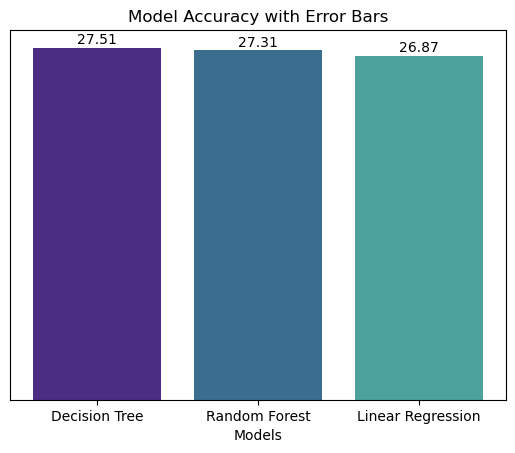

In [94]:
models = ['Linear Regression', 'Decision Tree', 'Random Forest']
mean_accuracy = [26.87, 27.51, 27.31]

# Sort the data in descending order of mean_accuracy
sorted_indices = np.argsort(mean_accuracy)[::-1]
models = [models[i] for i in sorted_indices]
mean_accuracy = [mean_accuracy[i] for i in sorted_indices]


#Plotting a bar chart
plt.bar(models, mean_accuracy, capsize=5, color=["#4B2E83", "#3B6D8F", "#4DA19C"])
plt.xlabel('Models')
plt.ylabel('Mean Accuracy')
plt.title('Model Accuracy with Error Bars')

# Add data labels
for i, value in enumerate(mean_accuracy):
    plt.text(i, value + 0.3, f'{value:.2f}', ha='center')

# Removing y-axis
plt.gca().axes.get_yaxis().set_visible(False)

#Displaying Chart
plt.show()

### MACHINE LEARNING ANALYSIS

To find the best machine learning algorithm to predict the prices of products for our client, we evaluated three different models for this purpose:

- Linear Regression
- Decision Tree
- Random Forest

After comparing predictions from each model, we selected the Linear Regression because it has a lower root mean squared error eventhough the price predicted is higher. The Decision Tree model gave the most accurate price prediction, that is, it produced the exact price of the product but the Root Mean Squared Error (RMSE), was higher than the other models hence further investigations must be done if we want to consider it. It could be as a result of the ratings in our dataset since they were the only features left out to train our models.

### Conclusion

The data analysis reveals several key insights into the Lavender Lane brand’s performance across products, categories, and brands. There is a clear opportunity to enhance customer satisfaction by focusing on Kids' Fashion, where there is variability in ratings, indicating potential quality inconsistencies. Stable categories like Men’s and Women’s Fashion show room for incremental improvements to further elevate their appeal.

Popular products like Jeans, Shoes, and Sweaters can be promoted as flagship items, while targeted marketing on preferred colors and sizes can help meet customer expectations more precisely. Brands like Gucci and Zara, with higher positive ratings, can be used to build brand loyalty and upsell premium products. Conversely, focusing on quality improvements for Adidas and H&M could help balance out their rating distribution, making them more competitive in the market.

In summary, by leveraging these insights and implementing targeted improvements, the brand can enhance customer experience, optimize inventory, and potentially increase sales across product categories and brands.


### Recommendations

1. Improve Kids' Fashion Quality and Consistency:
Since Kids' Fashion shows the most variability in ratings, consider investigating the products in this category to understand the root causes of customer dissatisfaction. Conduct surveys or gather feedback on specific aspects such as durability, comfort, and design. Implementing stricter quality control measures or refining product designs could help improve overall ratings and customer satisfaction in this category.

2. Enhance Product Appeal in Men’s and Women’s Fashion:
Although Men’s and Women’s Fashion have relatively stable ratings, Men's Fashion could benefit from incremental quality improvements to bring its ratings closer to Women’s Fashion. Investing in product development to add innovative features or improve comfort and style may attract more positive ratings, helping these categories compete with the high satisfaction seen in other segments.

3. Adjust Marketing Focus Based on Product and Category Popularity:
Since Jeans, Shoes, and Sweaters are the most popular products, consider allocating a larger portion of the marketing budget to these items, potentially highlighting these as key products across campaigns. Likewise, an emphasis on Kids' Fashion, which outperforms other categories in terms of quantity sold, could further strengthen its presence and drive sales in this segment.

4. Introduce Targeted Promotions for Colors and Sizes in High Demand:
White is the most popular color across products, suggesting a strong preference among customers. Consider introducing new styles or special editions featuring white as a primary color to boost appeal. Additionally, understanding that different sizes are favored within categories (e.g., large sizes in Kids' Fashion and small sizes in Men’s Fashion) can help optimize inventory management and meet customer demand more effectively.
   
5. Increase Marketing and Product Development for Sweaters and Dresses:
Since Sweaters and Dresses have slightly lower average prices than other products, investing in enhanced marketing or value-added features (like improved fabric quality or design variety) could make these products more appealing, potentially raising their sales. This effort could help bring their performance in line with higher-priced items like Shoes and T-Shirts.
   
6. Enhance the Reputation of Lower-Rated Brands (e.g., Adidas, H&M):
Adidas and H&M show a concentration of "Poor" and "Fair" ratings, which may indicate customer dissatisfaction. Addressing these concerns with improvements in product quality, customer service, or brand transparency could help enhance their reputation. Offering targeted promotions or customer loyalty incentives for these brands might also encourage repeat purchases and boost their ratings.

7. Leverage Positive Brand Ratings (Gucci and Zara) for Upselling:
Gucci and Zara generally receive better ratings, especially with higher counts in "Very Good" and "Excellent" categories. Use these positive brand perceptions to introduce premium lines or limited-edition products under these brands. Highlighting customer reviews in marketing materials could further reinforce their reputation and encourage higher sales.

8. Tailor Inventory Based on Popular Size Demand:
Since there are distinct size preferences within each fashion category, stock more of the high-demand sizes (e.g., large sizes for Kids' Fashion, small sizes for Men’s Fashion, and extra-large for Women's Fashion). This approach can help reduce stockouts and improve customer satisfaction by ensuring that popular sizes are consistently available.